In [1]:
import pandas as pd
import numpy as np
from joblib import Parallel, delayed
from contextlib import contextmanager
import joblib
from tqdm import tqdm
import os
import pathlib
tqdm.pandas()

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from matplotlib.patches import Ellipse, Circle
import seaborn as sns

pd.set_option('display.max_rows', 500)

from IPython.display import HTML

In [2]:
base= "../store"
trains = sorted(os.listdir(base))

strat_1 = []
strat_2 = []
strat_3 = []

for i in tqdm(trains):
    f = f"{base}/{i}/trial_stats/training_1.parquet"
    t = pd.read_parquet(f)
    strat_1.append(t.activated_by.value_counts().to_dict())
    strat_2.append(t.first_close_to_zone.value_counts().to_dict())
    strat_3.append(t.first_to_zone.value_counts().to_dict())

100%|██████████| 100/100 [00:00<00:00, 541.60it/s]


In [3]:
l1 = [ "a1" if e["a1"] > e["a2"] else "a2" for e in strat_1]
f1 = [ "a1" if e["a1"] < e["a2"] else "a2" for e in strat_1]

l2 = [ "a1" if e["a1"] > e["a2"] else "a2" for e in strat_2]
f2 = [ "a1" if e["a1"] < e["a2"] else "a2" for e in strat_2]

l3 = [ "a1" if e["a1"] > e["a2"] else "a2" for e in strat_3]
f3 = [ "a1" if e["a1"] < e["a2"] else "a2" for e in strat_3]

KeyError: 'a1'

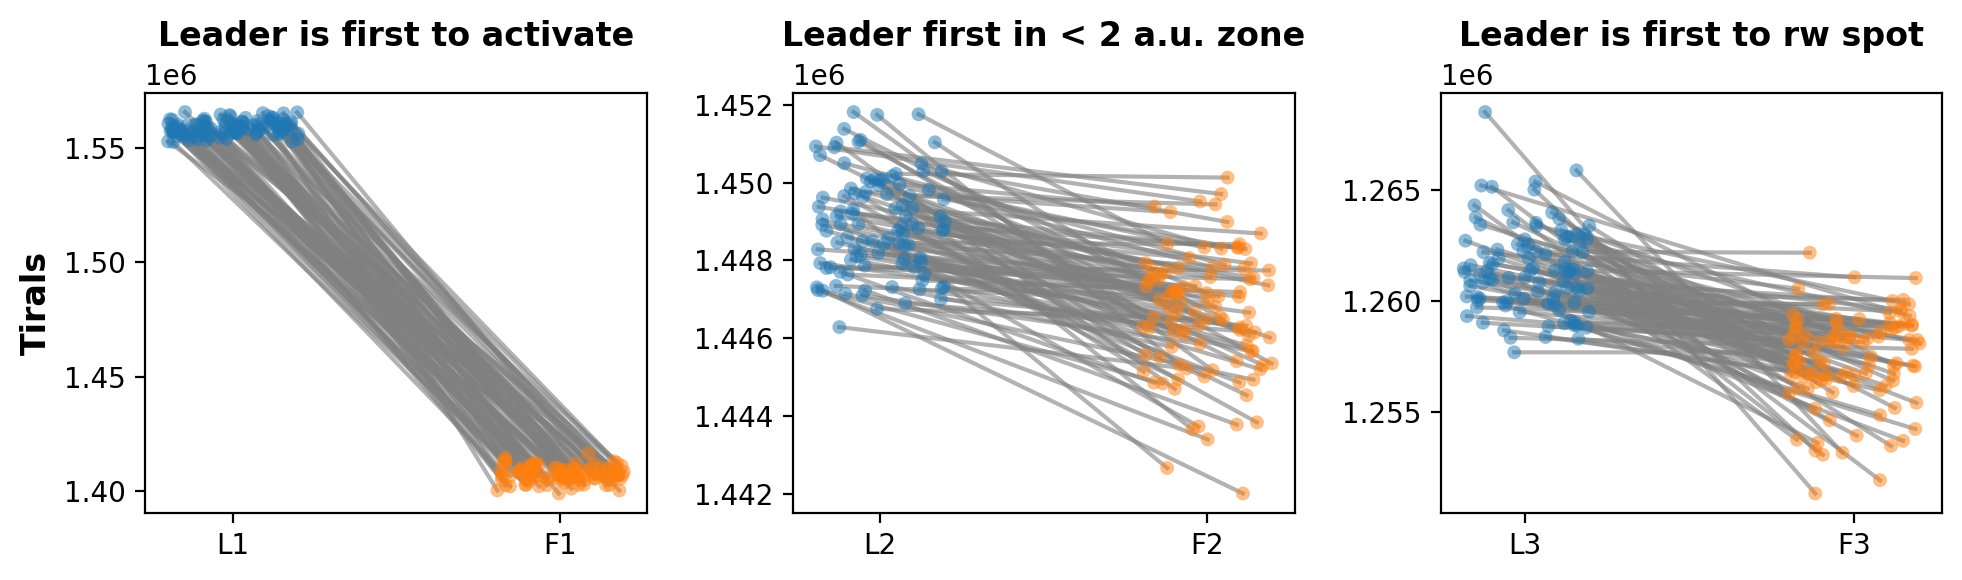

In [ ]:
# Plotting the leaders and followers aligned
fig, axs = plt.subplots(1, 3, figsize=(10, 3), sharey=False, dpi=200)

# getting the leader 1
l1_data = {
    'L1': [strat_1[i][l] for i, l in enumerate(l1)],
    'F1': [strat_1[i][l] for i, l in enumerate(f1)],
}

l2_data = {
    'L2': [strat_2[i][l] for i, l in enumerate(l2)],
    'F2': [strat_2[i][l] for i, l in enumerate(f2)],
}

l3_data = {
    'L3': [strat_3[i][l] for i, l in enumerate(l3)],
    'F3': [strat_3[i][l] for i, l in enumerate(f3)],
}

ax = sns.stripplot(data=l1_data, ax=axs[0], jitter=0.2, alpha=0.5)
offsets = {}
for collection, category in zip(ax.collections, ["L1", "F1"]):
    offsets[category] = np.array(collection.get_offsets())

# Draw connecting lines
for i in range(len(l1)):
    x1, y1 = offsets["L1"][i]
    x2, y2 = offsets["F1"][i]
    axs[0].plot([x1, x2], [y1, y2], color='gray', linestyle='-', alpha=0.6)

axs[0].set_title('Leader is first to activate', fontsize=12, fontweight='bold')

ax = sns.stripplot(data=l2_data, ax=axs[1], jitter=0.2, alpha=0.5)
offsets = {}
for collection, category in zip(ax.collections, ["L2", "F2"]):
    offsets[category] = np.array(collection.get_offsets())

# Draw connecting lines
for i in range(len(l2)):
    x1, y1 = offsets["L2"][i]
    x2, y2 = offsets["F2"][i]
    axs[1].plot([x1, x2], [y1, y2], color='gray', linestyle='-', alpha=0.6)

axs[1].set_title('Leader first in < 2 a.u. zone', fontsize=12, fontweight='bold')

ax = sns.stripplot(data=l3_data, ax=axs[2], jitter=0.2, alpha=0.5)
offsets = {}
for collection, category in zip(ax.collections, ["L3", "F3"]):
    offsets[category] = np.array(collection.get_offsets())

# Draw connecting lines
for i in range(len(l3)):
    x1, y1 = offsets["L3"][i]
    x2, y2 = offsets["F3"][i]
    axs[2].plot([x1, x2], [y1, y2], color='gray', linestyle='-', alpha=0.6)
    
axs[2].set_title('Leader is first to rw spot', fontsize=12, fontweight='bold')
axs[0].set_ylabel('Tirals', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()